In [ ]:
!pip install pandas
!pip install scikit-learn
!pip install torch
!pip install matplotlib


In [5]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt

# Load and preprocess the data
data = pd.read_csv('league_of_legends_data_large.csv')
X = data.drop(columns=['win'])
y = data['win']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

In [6]:
# Define the logistic regression model using PyTorch
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)
    
    def forward(self, x):
        return torch.sigmoid(self.linear(x))
    
model = LogisticRegressionModel(X_train.shape[1])
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

Epoch [100/1000], Loss: 0.6907
Epoch [200/1000], Loss: 0.6903
Epoch [300/1000], Loss: 0.6903
Epoch [400/1000], Loss: 0.6903
Epoch [500/1000], Loss: 0.6903
Epoch [600/1000], Loss: 0.6903
Epoch [700/1000], Loss: 0.6903
Epoch [800/1000], Loss: 0.6903
Epoch [900/1000], Loss: 0.6903
Epoch [1000/1000], Loss: 0.6903
Accuracy on training set: 52.25%
Accuracy on test set: 53.50%


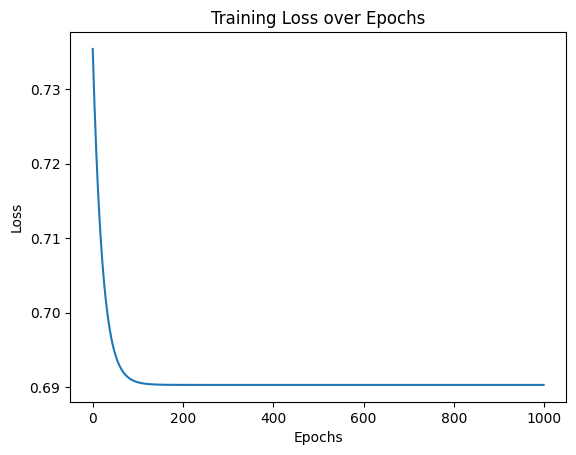

In [7]:
# Train the model
epochs = 1000
training_loss = []
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    training_loss.append(loss.item())
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')
# Evaluate the model
model.eval()
with torch.no_grad():
    train_outputs = model(X_train_tensor)
    train_predicted = (train_outputs >= 0.5).float()
    train_accuracy = (train_predicted.eq(y_train_tensor).sum().item()) / y_train_tensor.size(0)
    print(f'Accuracy on training set: {train_accuracy * 100:.2f}%')
    assert 0.0 <= train_accuracy <= 1.0, "Train accuracy out of bounds"
    test_outputs = model(X_test_tensor)
    test_predicted = (test_outputs >= 0.5).float()
    test_accuracy = (test_predicted.eq(y_test_tensor).sum().item()) / y_test_tensor.size(0)
    print(f'Accuracy on test set: {test_accuracy * 100:.2f}%')
    assert 0.0 <= test_accuracy <= 1.0, "Test accuracy out of bounds"
    # Overfit test: model should fit perfectly on tiny dataset
    # assert train_accuracy == 1.0, "Model did not overfit tiny dataset"

# Plot training loss
plt.plot(range(epochs), training_loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.show()

[L2] Epoch [100/1000], Loss: 0.7563
[L2] Epoch [200/1000], Loss: 0.7314
[L2] Epoch [300/1000], Loss: 0.7154
[L2] Epoch [400/1000], Loss: 0.7055
[L2] Epoch [500/1000], Loss: 0.6995
[L2] Epoch [600/1000], Loss: 0.6958
[L2] Epoch [700/1000], Loss: 0.6936
[L2] Epoch [800/1000], Loss: 0.6923
[L2] Epoch [900/1000], Loss: 0.6915
[L2] Epoch [1000/1000], Loss: 0.6910
[L2] Accuracy on training set: 53.50%
[L2] Accuracy on test set: 55.00%


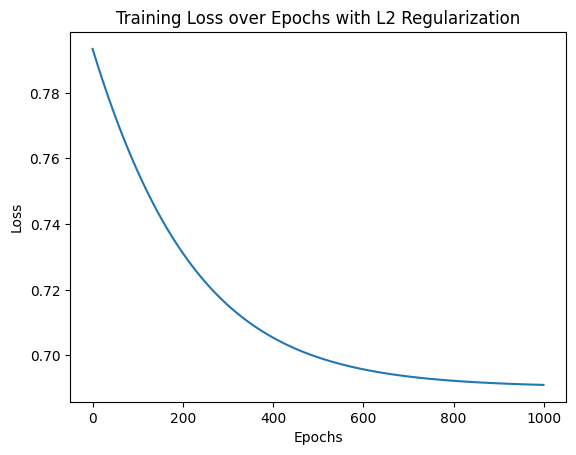

In [8]:
model = LogisticRegressionModel(X_train.shape[1])  # Reset the model!!
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=0.01)
# Re-train the model with L2 regularization
training_loss_l2 = []
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    training_loss_l2.append(loss.item())
    if (epoch+1) % 100 == 0:
        print(f'[L2] Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')
# Evaluate the model with L2 regularization
model.eval()
with torch.no_grad():
    train_outputs_l2 = model(X_train_tensor)
    train_predicted_l2 = (train_outputs_l2 >= 0.5).float()
    train_accuracy_l2 = (train_predicted_l2.eq(y_train_tensor).sum().item()) / y_train_tensor.size(0)
    print(f'[L2] Accuracy on training set: {train_accuracy_l2 * 100:.2f}%')
    assert 0.0 <= train_accuracy_l2 <= 1.0, "Train accuracy with L2 out of bounds"
    test_outputs_l2 = model(X_test_tensor)
    test_predicted_l2 = (test_outputs_l2 >= 0.5).float()
    test_accuracy_l2 = (test_predicted_l2.eq(y_test_tensor).sum().item()) / y_test_tensor.size(0)
    print(f'[L2] Accuracy on test set: {test_accuracy_l2 * 100:.2f}%')
    assert 0.0 <= test_accuracy_l2 <= 1.0, "Test accuracy with L2 out of bounds"
# Plot training loss with L2 regularization
plt.plot(range(epochs), training_loss_l2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs with L2 Regularization')
plt.show()



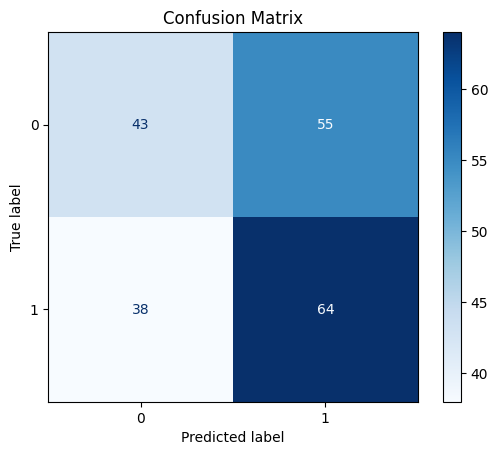

              precision    recall  f1-score   support

     Class 0       0.53      0.44      0.48        98
     Class 1       0.54      0.63      0.58       102

    accuracy                           0.54       200
   macro avg       0.53      0.53      0.53       200
weighted avg       0.53      0.54      0.53       200



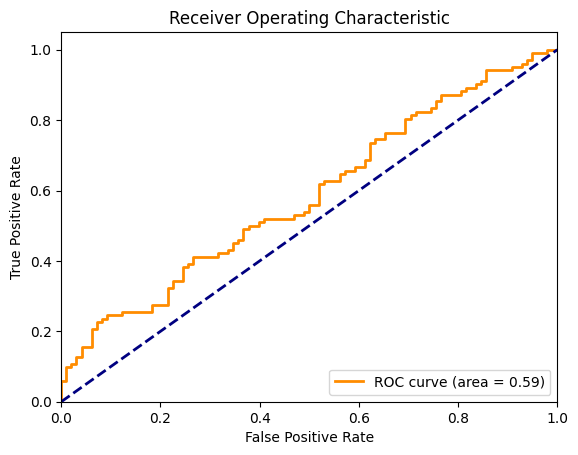

In [9]:

# Model performance using confusion matrix
y_test_np = y_test_tensor.numpy()
test_predicted_np = test_predicted.numpy()
cm = confusion_matrix(y_test_np, test_predicted_np)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_test_np, test_predicted_np, target_names=['Class 0', 'Class 1']))

# Model performance using ROC curve
fpr, tpr, _ = roc_curve(y_test_np, test_outputs.numpy())
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


In [10]:
# Save the model
torch.save(model.state_dict(), 'logistic_regression_model.pth')

# Load the model
model = LogisticRegressionModel(X_train.shape[1])
model.load_state_dict(torch.load('logistic_regression_model.pth'))


# Ensure the loaded model is in evaluation mode
model.eval()

# Evaluate the loaded model
with torch.no_grad():
    loaded_test_outputs = model(X_test_tensor)
    loaded_test_predicted = (loaded_test_outputs >= 0.5).float()
    loaded_test_accuracy = (loaded_test_predicted.eq(y_test_tensor).sum().item()) / y_test_tensor.size(0)
    print(f'Accuracy of loaded model on test set: {loaded_test_accuracy * 100:.2f}%')
    assert 0.0 <= loaded_test_accuracy <= 1.0, "Loaded model test accuracy out of bounds"





Accuracy of loaded model on test set: 55.00%


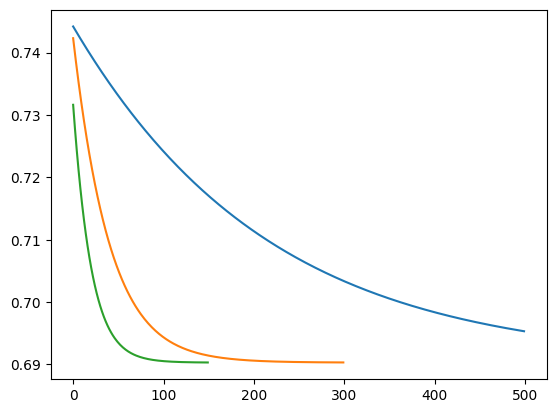

In [ ]:
# Testing different learning rates
learning_rates = [0.01, 0.05, 0.1]
epochs = [500, 300, 150]
for lr in learning_rates:
    model = LogisticRegressionModel(X_train.shape[1])
    optimizer = optim.SGD(model.parameters(), lr=lr)
    training_loss = []
    for epoch in range(epochs[learning_rates.index(lr)]):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)
        loss.backward()
        optimizer.step()
        training_loss.append(loss.item())
    plt.plot(range(epochs[learning_rates.index(lr)]), training_loss, label=f'LR={lr}')

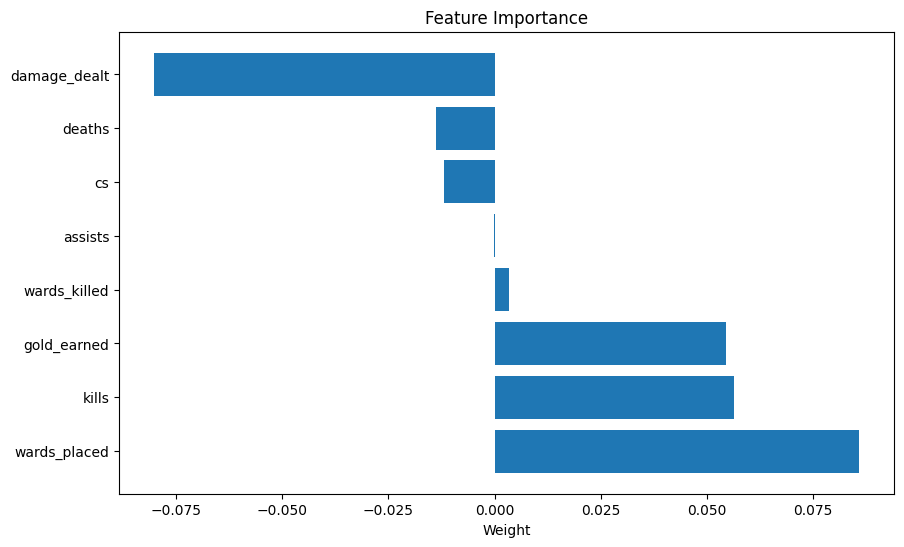

In [12]:

# Extract the weights of the linear layer
weights = model.linear.weight.detach().numpy().flatten()

# Create a DataFrame for feature importance
feature_names = X.columns
feature_importance = pd.DataFrame({'Feature': feature_names, 'Weight': weights})
feature_importance = feature_importance.sort_values(by='Weight', ascending=False)
# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Weight'])
plt.xlabel('Weight')
plt.title('Feature Importance')
plt.show()



